In [1]:
import numpy as np
import fermion as f
import matplotlib.pyplot as plt
from pandas import DataFrame
from fermion import Math as fm

from timeit import default_timer as timer

In [2]:
dq = f.Operator.double_quantum(50)
Z = f.Operator.global_Z(50)

time_evo = f.Unitary(dq,.05,2.05)

In [3]:
start = timer()
Zt = [time_evo.evolve_op(Z,t) for t in time_evo.t]
end = timer()
print(end - start)

0.07108399999999993


In [5]:
start = timer()
comm2 = [(Zt[i].commutator(Z).normal_order().compactify() ** 2).trace() for i in range(len(Zt))]
end = timer()
print(end - start)

5429.704369400002


In [6]:
5429.704369400002/(2/.05)

135.74260923500006

In [21]:
(5/40)*5429.704369400002*50/60/60

9.426570085763892

In [12]:
signal = [-comm2[i]/Z.n_fermion for i in range(len(Zt))]

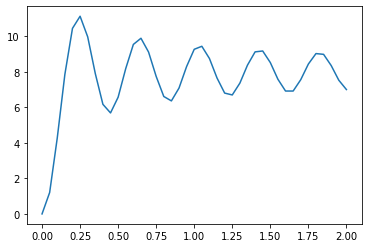

In [13]:
plt.plot(time_evo.t, signal)

In [14]:
lZ = [f.Operator.local_Z(i,50) for i in range(50)]

In [17]:
Zmid = lZ[24]
Zmt = [time_evo.evolve_op(Zmid,t) for t in time_evo.t]

In [29]:
def locOTOCs(idx):
    obs = 0;
    for i in range(50):
        obs += -1* (Zmt[idx].commutator(lZ[i]).normal_order().compactify() ** 2).trace()
    return obs

In [48]:
m2 = [locOTOCs(i) for i in range(6,20)]

In [49]:
msig.extend(m2)

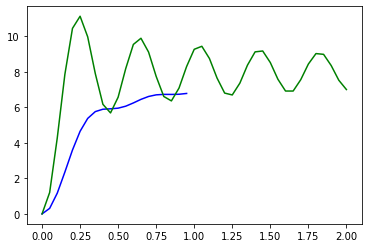

In [51]:
plt.plot(time_evo.t[0:20], msig, 'b', time_evo.t, signal, 'g')

In [54]:
non_com = (dq.commutator(Z).normal_order().compactify() ** 2).trace()

In [58]:
-non_com/50

(31.36-0j)